# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [31]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data processing libraries
import pandas as pd

# Visuals
#!pip install graphviz
#!pip install pydotplus
#!pip install IPython
#import graphviz
#import pydotplus
#from IPython.display import Image
from matplotlib import pyplot as plt

## Loading datasets

In [32]:
df = pd.read_csv(r"League_Result_Data/Encoded_PremierLeague_Stats_From_2014to2021.csv")
time_df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2569 non-null   int64  
 1   Season                 2569 non-null   object 
 2   Season Encoding        2569 non-null   int64  
 3   Date                   2569 non-null   object 
 4   YearOfSeason           2414 non-null   object 
 5   HomeTeam               2569 non-null   object 
 6   HomeTeam Encoding      2569 non-null   int64  
 7   AwayTeam               2569 non-null   object 
 8   AwayTeam Encoding      2569 non-null   int64  
 9   FTHG                   2569 non-null   float64
 10  FTAG                   2569 non-null   float64
 11  FTR                    2569 non-null   object 
 12  FTR Encoding           2569 non-null   int64  
 13  HTHG                   2569 non-null   float64
 14  HTAG                   2569 non-null   float64
 15  HTR 

In [34]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "Unnamed: 0", "YearOfSeason", "Date", "FTHG", "FTAG", "HTHG", "HTAG", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,HTR Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,8,0,1,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,0,6,21,0,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,0,13,11,0,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,0,28,17,2,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,0,27,12,2,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,1,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0
2565,2,10,15,2,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0
2566,2,12,19,0,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0
2567,2,14,21,0,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        2569 non-null   int64  
 1   HomeTeam Encoding      2569 non-null   int64  
 2   AwayTeam Encoding      2569 non-null   int64  
 3   HTR Encoding           2569 non-null   int64  
 4   Referee Encoding       2569 non-null   int64  
 5   Fouls Called Per Game  2569 non-null   float64
 6   HS                     2569 non-null   float64
 7   AS                     2569 non-null   float64
 8   HST                    2569 non-null   float64
 9   AST                    2569 non-null   float64
 10  HF                     2569 non-null   float64
 11  AF                     2569 non-null   float64
 12  HC                     2569 non-null   float64
 13  AC                     2569 non-null   float64
 14  HY                     2569 non-null   float64
 15  AY  

In [36]:
X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,HTR Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,8,0,1,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,0,6,21,0,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,0,13,11,0,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,0,28,17,2,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,0,27,12,2,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,1,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0
2565,2,10,15,2,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0
2566,2,12,19,0,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0
2567,2,14,21,0,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0


In [37]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0       1
1       0
2       0
3       1
4       1
       ..
2564    1
2565    2
2566    0
2567    0
2568    0
Name: FTR Encoding, Length: 2569, dtype: int64

In [38]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

In [40]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 15, 
                                      max_features=10,
                                      random_state=42,
                                      min_samples_split=3,
                                      max_depth=10)

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [41]:
score = clf_train.score(X_test, y_test)

print(score)

0.6342412451361867


In [42]:
# Confusion Matrix

cv_score = cross_val_score(clf_train, X_train, y_train, cv=3, scoring='accuracy')

print(cv_score, '\n')

y_train_pred = cross_val_predict(clf_train, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

[0.63211679 0.6379562  0.64087591] 

[[713 136  70]
 [ 99 502  48]
 [212 181  94]]


In [43]:
# Precision, Recall, F1

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.73       919
           1       0.61      0.77      0.68       649
           2       0.44      0.19      0.27       487

    accuracy                           0.64      2055
   macro avg       0.58      0.58      0.56      2055
weighted avg       0.61      0.64      0.61      2055



## Visualizing the tree

Create visual plots for the decision tree

In [44]:
fn = list(X.columns)
cn ='0', '1', '2'

In [45]:
cn

('0', '1', '2')

[Text(149.9625, 199.32, 'X[9] <= -0.19\ngini = 0.644\nsamples = 2055\nvalue = [919, 649, 487]'),
 Text(76.72500000000001, 163.07999999999998, 'X[3] <= -0.674\ngini = 0.568\nsamples = 969\nvalue = [562, 145, 262]'),
 Text(41.85, 126.83999999999999, 'X[8] <= 0.704\ngini = 0.204\nsamples = 397\nvalue = [352, 5, 40]'),
 Text(27.900000000000002, 90.6, 'X[9] <= -0.624\ngini = 0.287\nsamples = 237\nvalue = [197, 5, 35]'),
 Text(13.950000000000001, 54.359999999999985, 'gini = 0.184\nsamples = 149\nvalue = [134, 3, 12]'),
 Text(41.85, 54.359999999999985, 'gini = 0.419\nsamples = 88\nvalue = [63, 2, 23]'),
 Text(55.800000000000004, 90.6, 'gini = 0.061\nsamples = 160\nvalue = [155, 0, 5]'),
 Text(111.60000000000001, 126.83999999999999, 'X[8] <= -0.821\ngini = 0.655\nsamples = 572\nvalue = [210, 140, 222]'),
 Text(83.7, 90.6, 'X[3] <= 0.485\ngini = 0.607\nsamples = 133\nvalue = [18, 60, 55]'),
 Text(69.75, 54.359999999999985, 'gini = 0.314\nsamples = 41\nvalue = [0, 33, 8]'),
 Text(97.65, 54.35999

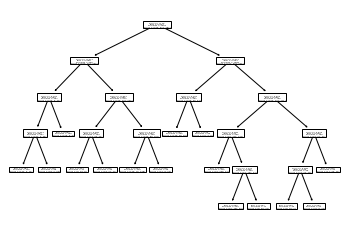

In [46]:
tree.plot_tree(clf_train)

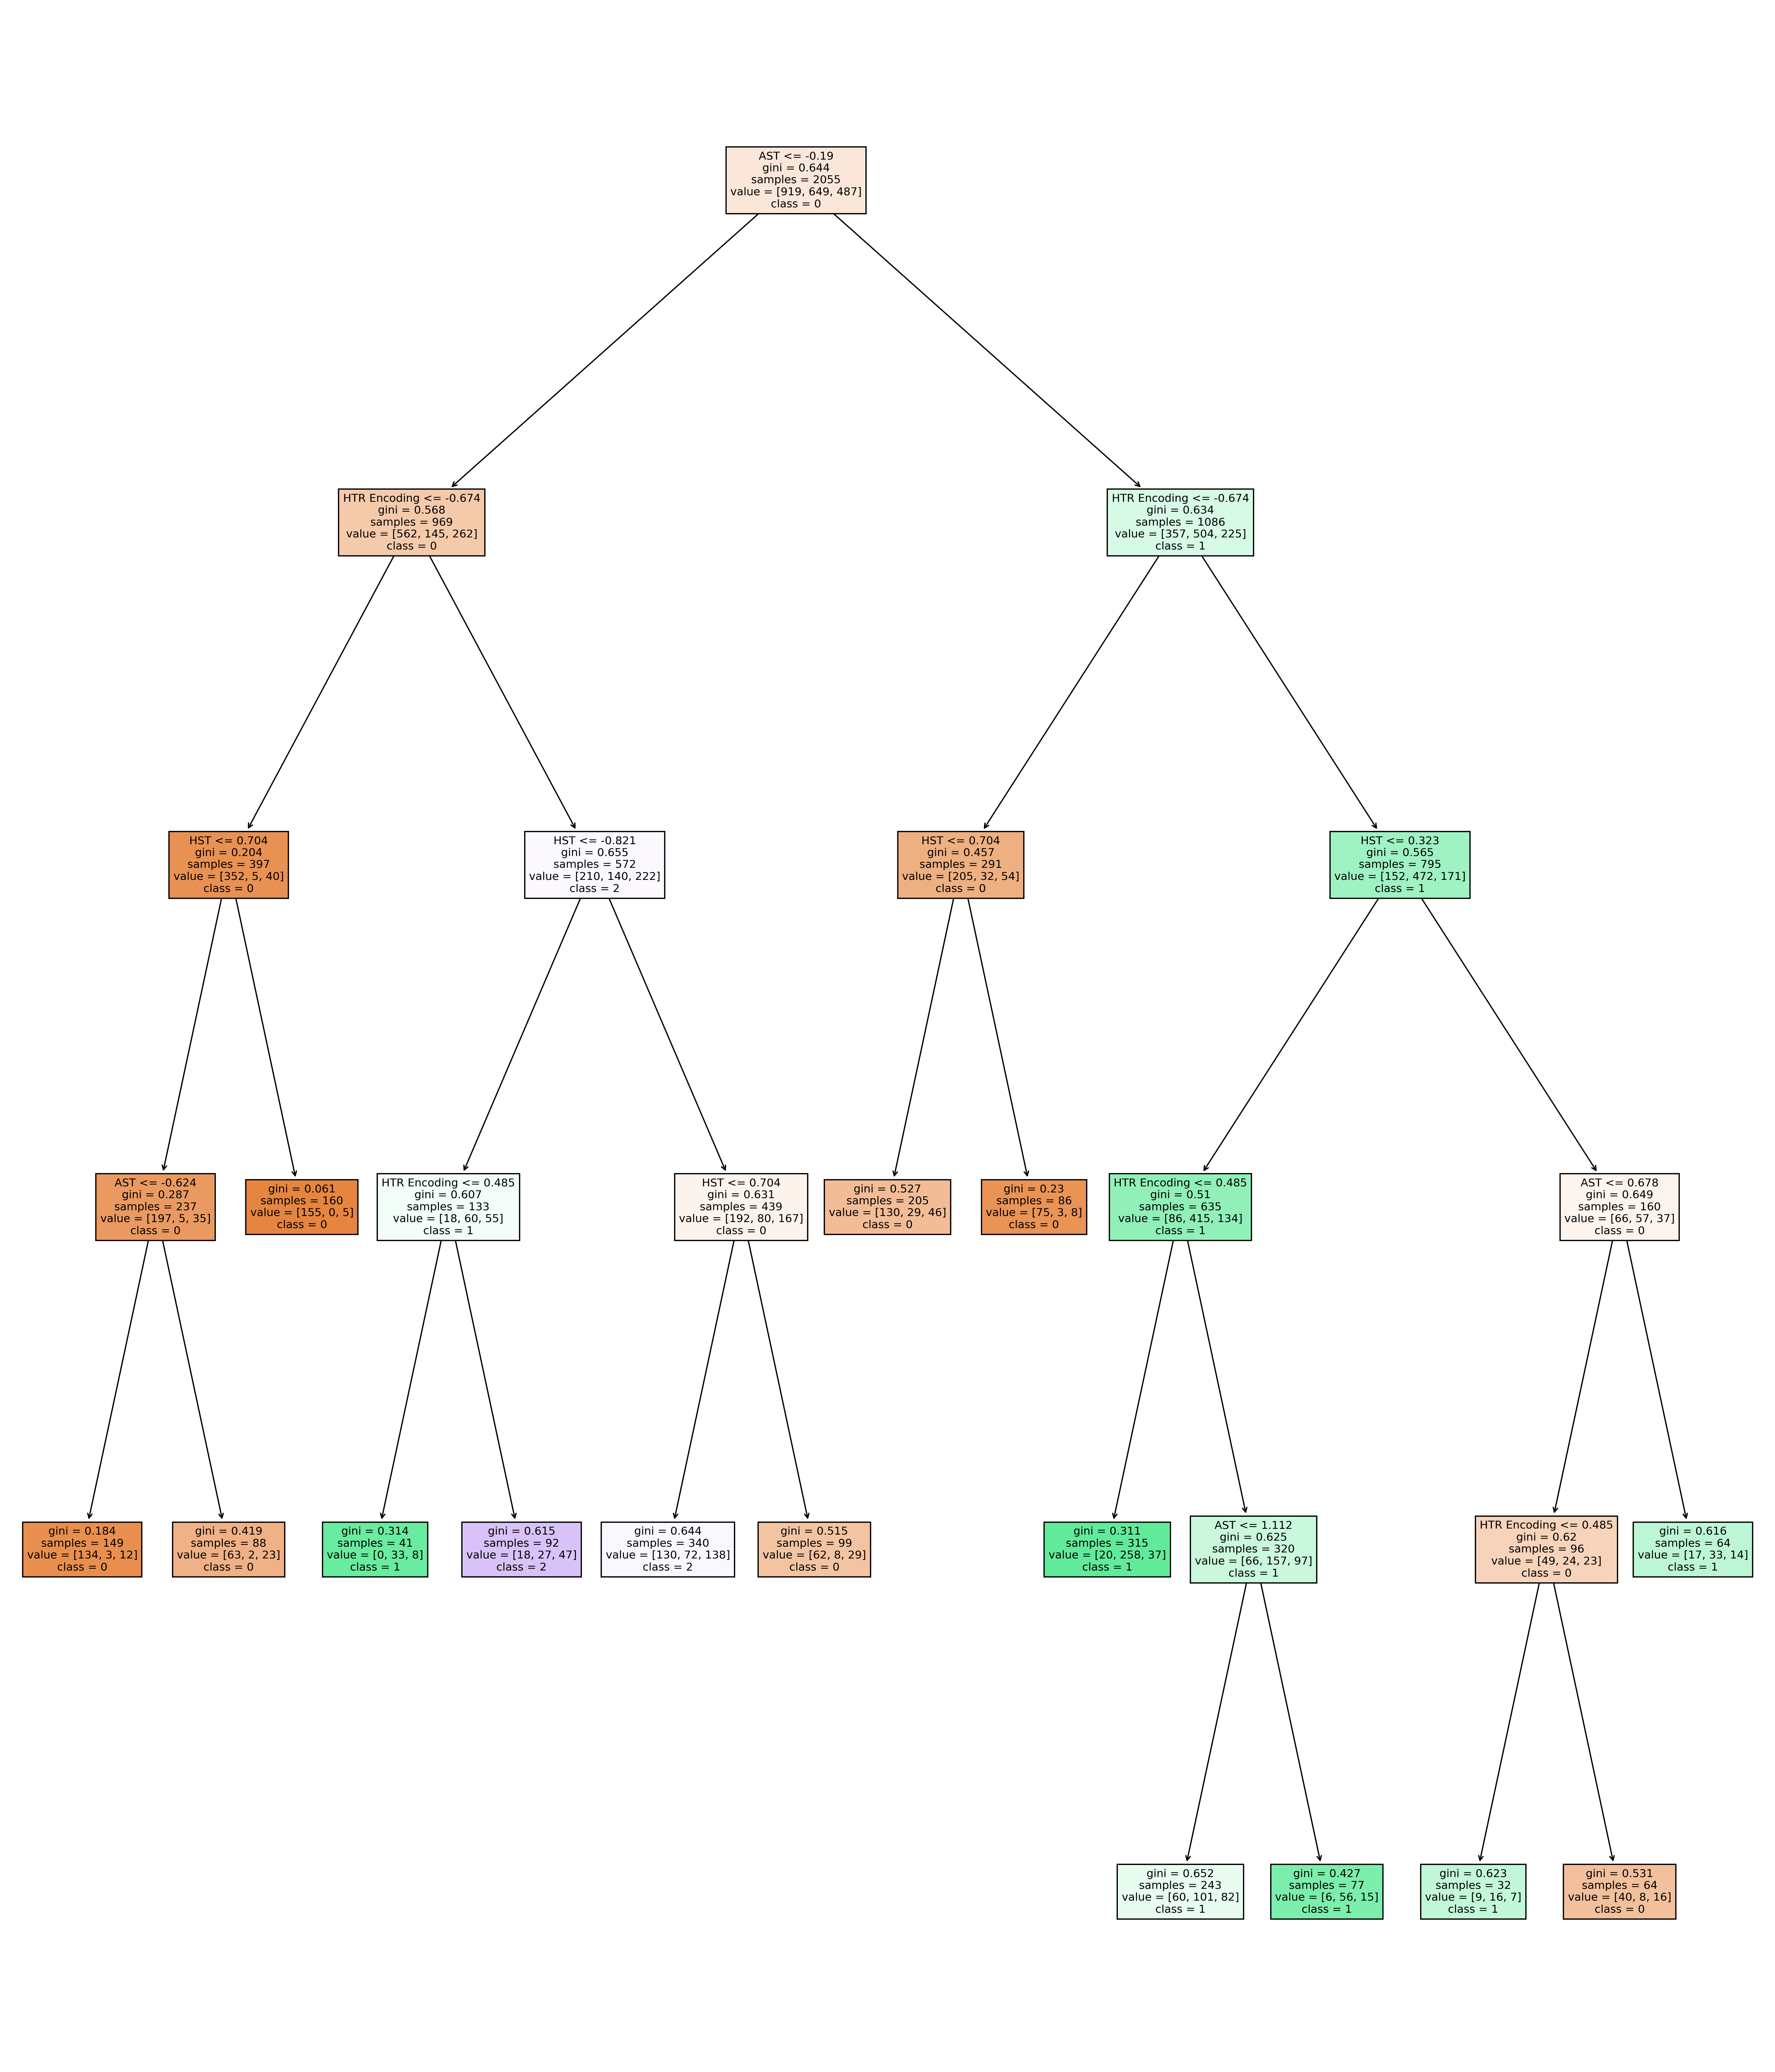

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d